# CRTS

06 April 2016 - <mquartulli@vicomtech.org>

Is the data file there?

In [1]:
! ls -l

total 31672
-rw-r--r--  1 marcoq  staff  4428433 Apr  6 10:21 010_scikitslearn-rasterio-0.ipynb
-rw-r--r--  1 marcoq  staff  3290497 Apr  6 10:31 020_igarss2015.ipynb
-rw-r--r--  1 marcoq  staff  3242595 Apr  6 09:21 030_Sentinel2LatLonHeightPix-1.ipynb
-rw-r--r--  1 marcoq  staff  2665920 Apr  5 15:44 04_open_source_tools.ipynb
-rw-r--r--@ 1 marcoq  staff     1939 May 23  2015 README.md
lrwxr-xr-x  1 marcoq  staff       59 Apr  3 18:36 all_donosti_cropped_wgs4326.tif -> /Users/marcoq/Data/donostia/all_donosti_cropped_wgs4326.tif
-rw-r--r--@ 1 marcoq  staff    58495 Apr  4 07:24 bselogo.png
-rw-r--r--  1 marcoq  staff   432488 Apr  6 11:57 crts.ipynb
-rw-r-----@ 1 marcoq  staff   353521 Apr  6 11:56 crts_6objs.csv
-rw-r--r--  1 marcoq  staff       44 Apr  5 14:34 crts_transients.url
-rw-r--r--@ 1 marcoq  staff   321837 Apr  4 16:45 galaxies_sdss.csv
-rw-r--r--  1 marcoq  staff   432488 Apr  6 09:32 galaxy_sdss_similarity_matrices.ipynb
-rw-r--r--@ 1 marcoq  staff      296 Apr  5 14:33 

# Read CSV data

Data from the Catalina Transients catalogue

* <http://www.astro.caltech.edu/~aam/datasets/>

In [3]:
import pandas

In [4]:
df = pandas.read_csv('crts_6objs.csv',sep=';')

In [5]:
df.head()

,name,ra,dec,amplitude,beyond1std,fpr_mid20,fpr_mid35,fpr_mid50,fpr_mid65,fpr_mid80,...,pdfp,skew,kurtosis,std,ls,rcorbor,magratio,data_num,object,dmjd
0,CSS121123:051056-102401,77.732355,-10.400404,0.895000,0.375000,0.874820,0.907977,0.933366,0.950210,0.977077,...,1.303280,0.039772,-1.943315,0.794315,2.189545,0.00,0.500000,8,CV,56254
1,CSS121123:045020-093113,72.582463,-9.520167,0.750000,0.285714,0.085782,0.408489,0.629794,0.736414,0.870485,...,0.875122,-0.410660,-0.164669,0.348123,6.810391,0.00,0.476190,21,CV,56254
2,CSS121120:020633+205707,31.639308,20.952106,2.375000,0.276515,0.139132,0.233547,0.342220,0.494447,0.689385,...,2.122063,-1.241640,4.684604,0.685853,0.892231,0.00,0.500000,264,CV,56251
3,CSS121114:093946+065210,144.941736,6.869316,1.495698,0.500000,0.283271,0.434345,0.643386,0.890856,0.968692,...,2.305349,0.439216,-1.313829,1.067609,3.566479,0.25,0.500000,16,CV,56245
4,CSS121114:011948-241624,19.949708,-24.273572,0.281392,0.444444,0.615585,0.822992,0.903259,0.920250,0.954385,...,0.598318,-0.214480,-1.895450,0.240627,5.080029,0.00,0.444444,9,CV,56245


What you find here are features (statistical measures) on light-curves (time-series) for astronomical transients (objects that change in brightness in short amount of time).

There are 1619 examples belonging to 6 classes. These are: AGN, Blazar, CV, Flare, RR Lyrae, SN

Of these RR Lyrae are periodic, others are not. CVs and Blazars tend to be stochastic in nature.

Faraway, Mahabal et al.: Modeling Light Curves for Improved Classification (This also has another dataset that includes non-variables)

# Data filtering

In [7]:
df.shape

(1619, 23)

In [8]:
df.head()

,amplitude,beyond1std,fpr_mid20,fpr_mid35,fpr_mid50,fpr_mid65,fpr_mid80,linear_trend,max_slope,med_abs_dev,...,pdfp,skew,kurtosis,std,ls,rcorbor,magratio,data_num,object,dmjd
name,,,,,,,,,,,,,,,,,,,,,
CSS121123:051056-102401,0.895000,0.375000,0.874820,0.907977,0.933366,0.950210,0.977077,0.003387,50.287356,0.735000,...,1.303280,0.039772,-1.943315,0.794315,2.189545,0.00,0.500000,8,CV,56254
CSS121123:045020-093113,0.750000,0.285714,0.085782,0.408489,0.629794,0.736414,0.870485,0.000099,44.265594,0.260000,...,0.875122,-0.410660,-0.164669,0.348123,6.810391,0.00,0.476190,21,CV,56254
CSS121120:020633+205707,2.375000,0.276515,0.139132,0.233547,0.342220,0.494447,0.689385,-0.000139,258.164852,0.405000,...,2.122063,-1.241640,4.684604,0.685853,0.892231,0.00,0.500000,264,CV,56251
CSS121114:093946+065210,1.495698,0.500000,0.283271,0.434345,0.643386,0.890856,0.968692,0.000926,134.155388,0.909639,...,2.305349,0.439216,-1.313829,1.067609,3.566479,0.25,0.500000,16,CV,56245
CSS121114:011948-241624,0.281392,0.444444,0.615585,0.822992,0.903259,0.920250,0.954385,-0.000602,14.711447,0.089305,...,0.598318,-0.214480,-1.895450,0.240627,5.080029,0.00,0.444444,9,CV,56245


# Pre-process

In [6]:
df['name'] = df['name'].astype('category')
df = df[[ c for (i,c) in enumerate(df.columns) if i not in [1,2,-1,-2,-3]]]
df = df.set_index('name')

# Plot data

In [9]:
%matplotlib inline

In [10]:
from pandas.tools.plotting import scatter_matrix

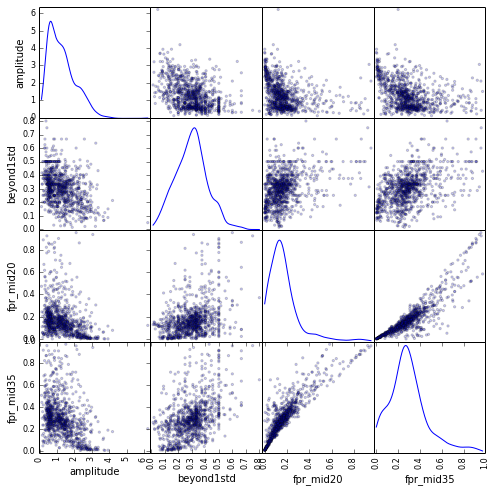

In [11]:
_ = scatter_matrix(df[df.columns[:4]].sample(n=1000), alpha=0.2, figsize=(8, 8), diagonal='kde')

Note: consider the `seaborn` library for better statistical plotting.

# Compute similarities

In [12]:
import sklearn.metrics.pairwise

In [14]:
dist = sklearn.metrics.pairwise.euclidean_distances(df[df.columns[:4]].values)

In [15]:
dist.shape

(1619, 1619)

In [16]:
import matplotlib.pylab

<matplotlib.colorbar.Colorbar instance at 0x11166c710>

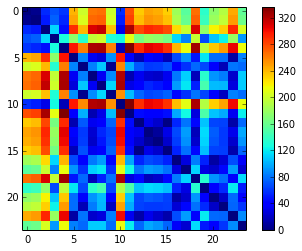

In [17]:
matplotlib.pylab.imshow(dist[:24,:24], interpolation='nearest')
matplotlib.pylab.colorbar()

# Extract outliers by integrating the similarity matrix?

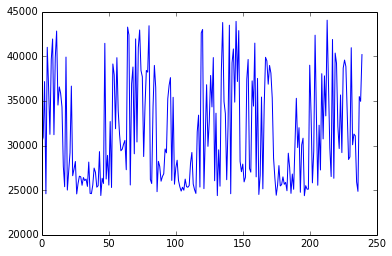

In [18]:
matplotlib.pylab.plot(dist[:240,:240].sum(axis=0))

Compute expected distance from other elements in the dataset.

In [19]:
df['mean_dist'] = dist.sum(axis=0)

In [20]:
df.head()

,ra,dec,amplitude,beyond1std,fpr_mid20,fpr_mid35,fpr_mid50,fpr_mid65,fpr_mid80,linear_trend,...,skew,kurtosis,std,ls,rcorbor,magratio,data_num,object,dmjd,mean_dist
name,,,,,,,,,,,,,,,,,,,,,
CSS121123:051056-102401,77.732355,-10.400404,0.895000,0.375000,0.874820,0.907977,0.933366,0.950210,0.977077,0.003387,...,0.039772,-1.943315,0.794315,2.189545,0.00,0.500000,8,CV,56254,193833.418254
CSS121123:045020-093113,72.582463,-9.520167,0.750000,0.285714,0.085782,0.408489,0.629794,0.736414,0.870485,0.000099,...,-0.410660,-0.164669,0.348123,6.810391,0.00,0.476190,21,CV,56254,198125.818267
CSS121120:020633+205707,31.639308,20.952106,2.375000,0.276515,0.139132,0.233547,0.342220,0.494447,0.689385,-0.000139,...,-1.241640,4.684604,0.685853,0.892231,0.00,0.500000,264,CV,56251,239746.415012
CSS121114:093946+065210,144.941736,6.869316,1.495698,0.500000,0.283271,0.434345,0.643386,0.890856,0.968692,0.000926,...,0.439216,-1.313829,1.067609,3.566479,0.25,0.500000,16,CV,56245,141140.939584
CSS121114:011948-241624,19.949708,-24.273572,0.281392,0.444444,0.615585,0.822992,0.903259,0.920250,0.954385,-0.000602,...,-0.214480,-1.895450,0.240627,5.080029,0.00,0.444444,9,CV,56245,266193.341723


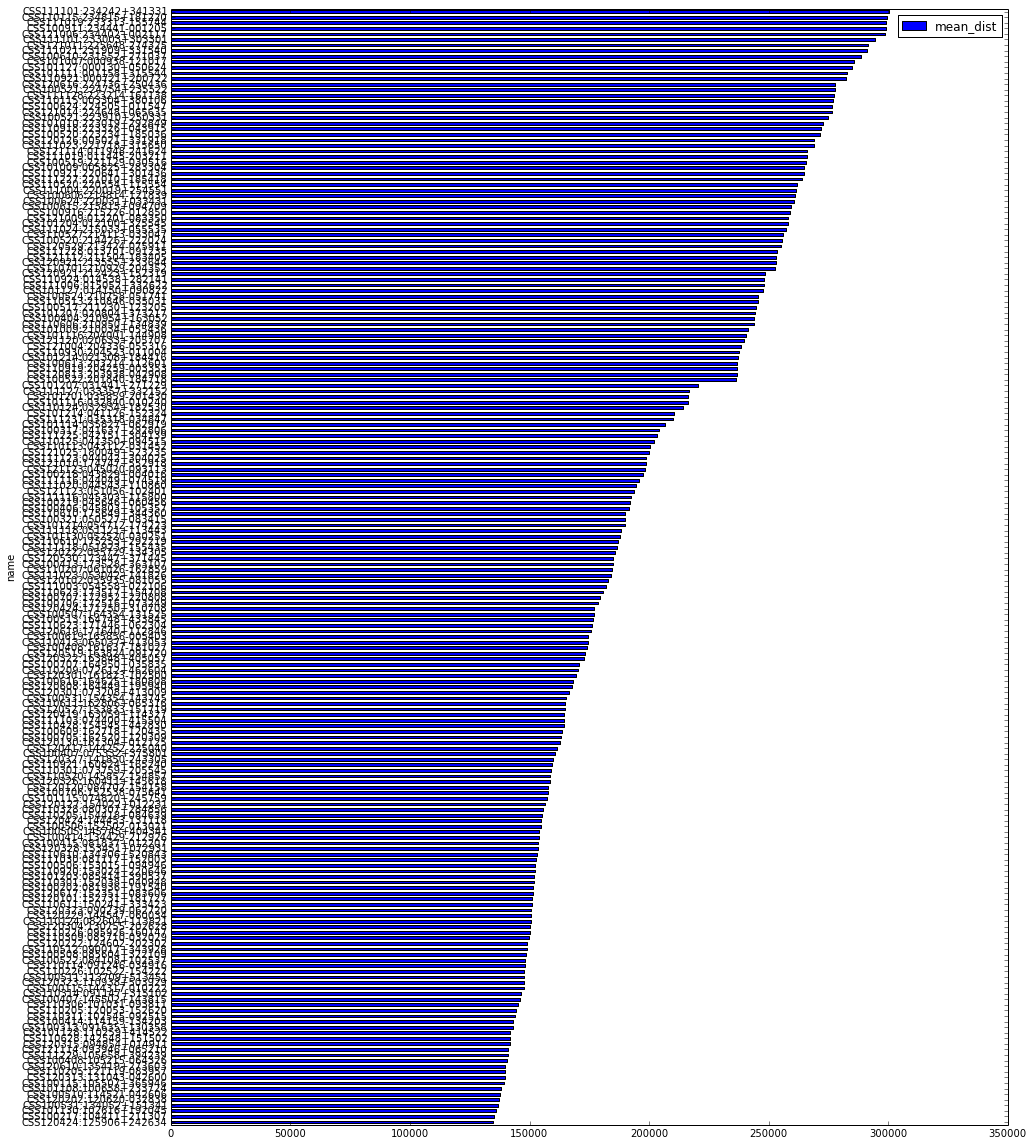

In [21]:
df.head(200).sort('mean_dist').plot(figsize=(15,20), kind='barh',y='mean_dist')

# In Spark

We try it again, this time in Spark, to understand about any differences in the way we need to think about the data.

# Start the cluster

In [22]:
import os
os.environ['SPARK_HOME'] = '/usr/local/spark-1.1.0/'
import sparklingpandas.utils
sparklingpandas.utils.add_pyspark_path()

In [23]:
import pyspark

In [24]:
conf = pyspark.conf.SparkConf()
conf.setAppName(__name__)

In [25]:
sc = pyspark.SparkContext(conf=conf)

In [26]:
sc.master

u'local[*]'

In [27]:
sc.defaultParallelism

4

# Transform the `pandas.DataFrame` to a `pyspark.RDD`

Notice that this is NOT typical. An RDD will generally be created by reading data from a distributed file system such as HDFS or from a DataBase

In [28]:
df.columns[:4]

Index([u'ra', u'dec', u'amplitude', u'beyond1std'], dtype='object')

In [29]:
df[df.columns[:4]].head()

,ra,dec,amplitude,beyond1std
name,,,,
CSS121123:051056-102401,77.732355,-10.400404,0.895000,0.375000
CSS121123:045020-093113,72.582463,-9.520167,0.750000,0.285714
CSS121120:020633+205707,31.639308,20.952106,2.375000,0.276515
CSS121114:093946+065210,144.941736,6.869316,1.495698,0.500000
CSS121114:011948-241624,19.949708,-24.273572,0.281392,0.444444


In [30]:
def dataframe2dict(df):
    return { df.index.tolist()[y]:df.values[y,:] for y in range(df.values.shape[0]) }

In [31]:
dataframe2dict(df[df.columns[:4]].head(2))

{'CSS121123:045020-093113': array([ 72.582463,  -9.520167,   0.75    ,   0.285714]),
 'CSS121123:051056-102401': array([ 77.732355, -10.400404,   0.895   ,   0.375   ])}

### TODO: remember extending the analysis to all samples in the next block

In [32]:
N = 200

In [33]:
df_rdd = sc.parallelize(dataframe2dict(df[df.columns[:4]].head(N)).iteritems())

# How to think about the `RDD`

It behaves a lot like a list

In [34]:
df_rdd.cartesian(df_rdd).count()

40000

In this case, a list of dictionaries

In [35]:
df_rdd.take(1)

[('CSS121009:012201-083350',
  array([ 20.50222 ,  -8.563747,   2.191364,   0.272727]))]

# Compute cartesian product of item set

We need to do this to go from a linear to a matrix structure

In [36]:
df_rdd.cartesian(df_rdd).take(1)

[(('CSS121009:012201-083350',
   array([ 20.50222 ,  -8.563747,   2.191364,   0.272727])),
  ('CSS121009:012201-083350',
   array([ 20.50222 ,  -8.563747,   2.191364,   0.272727])))]

In [37]:
df_rdd.cartesian(df_rdd)\
      .map(lambda ab:(ab[0][0],ab[0][1],ab[1][1]))\
      .take(1)

[('CSS121009:012201-083350',
  array([ 20.50222 ,  -8.563747,   2.191364,   0.272727]),
  array([ 20.50222 ,  -8.563747,   2.191364,   0.272727]))]

We keep the ID for the first element of the couple: we will need to group distances based on it before computing the mean distance for each element.

Question: does this $O(N^2)$ procedure really make sense?

# Compute euclidean distance matrix by `map`

We keep using `sklearn` to compute the distance between to items.
Note how we can keep using the "Python Data Stack" (`numpy`, `sklearn` and more) because the interpretation is carried out by Python on the worker nodes.

In [38]:
def euclidean_distance(ab):
    import sklearn.metrics
    a = ab[1]
    b = ab[2]
    return sklearn.metrics.pairwise.distance.euclidean(a,b)

Note the `import` inside the function.

The correct yet opaque way to do this is by `sc.addPyFile(sklearn.metrics.__file__)`

In [39]:
dist_rdd = df_rdd.cartesian(df_rdd)\
                 .map(lambda ab:(ab[0][0],ab[0][1],ab[1][1]))\
                 .map(lambda x: (x[0], euclidean_distance(x)))

In [40]:
dist_rdd.take(2)

[('CSS121009:012201-083350', 0.0),
 ('CSS121009:012201-083350', 332.88432593248785)]

# Integrate to get expectation by `reduce`

In [41]:
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .take(2)

[('CSS120530:173447+371445', 109.85357169225342),
 ('CSS110610:175649+344360', 111.31606603272853)]

Note the reduction based on the `objID` key

# Sort

In [42]:
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .sortBy(lambda x: x[1], ascending=False)\
        .take(3)

[('CSS101007:000938-121017', 196.72979959204756),
 ('CSS101127:000130+050624', 196.67655747439255),
 ('CSS101111:001158+315544', 195.55172655338865)]

# Collect top N for plotting

In [43]:
df_mean_dist = \
dist_rdd.reduceByKey(lambda x,y:x+y)\
        .map(lambda x:(x[0], x[1]/float(N)))\
        .sortBy(lambda x: x[1], ascending=False)\
        .take(N)

In [44]:
df_spark = pandas.DataFrame(df_mean_dist)
df_spark.columns = [ 'name', 'mean_dist' ]
df_spark['name'] = df_spark['name'].astype('category')
df_spark.set_index('name').head()

,mean_dist
name,
CSS101007:000938-121017,196.729800
CSS101127:000130+050624,196.676557
CSS101111:001158+315544,195.551727
CSS110921:000721+200722,195.349386
CSS110115:003304+380106,191.795896


In [45]:
df_spark.shape

(200, 2)

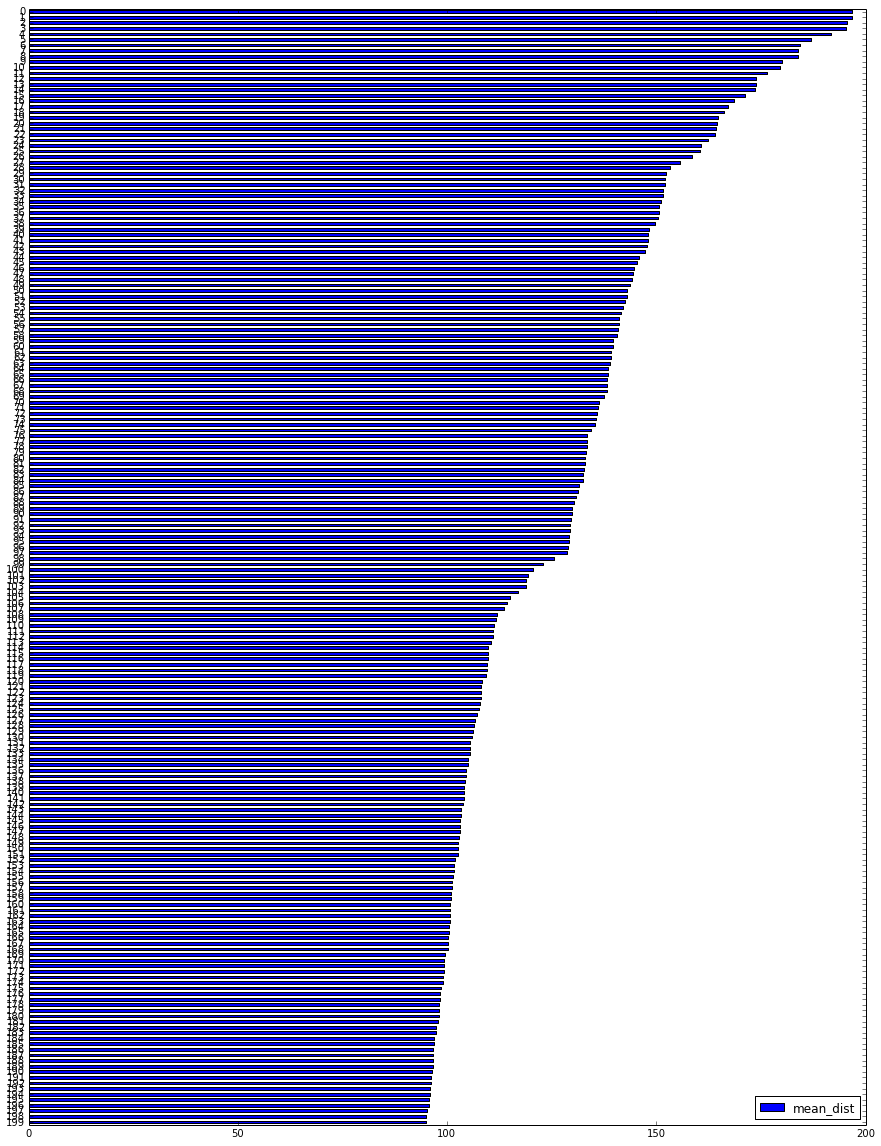

In [46]:
df_spark.sort('mean_dist').plot(figsize=(15,20), kind='barh',y='mean_dist')